In [1]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
from matplotlib import style

# Display maximum columns
pd.set_option('display.max_columns', None)

In [2]:
# Data starts in 2016
year = 2022

In [3]:
# Import the NGS data
df = nfl.import_ngs_data(stat_type='passing')

In [4]:
# Get a look at the data
df

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Matt Ryan,QB,ATL,2.640436,7.211903,8.972697,-1.760793,20.973783,61.429512,-0.169625,534,4944,38,7,117.127029,373,69.850187,62.408454,7.441733,21.259711,63.017923,00-0026143,Matthew,Ryan,2,M.Ryan
1,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,19.732441,53.598400,-0.408344,598,4027,26,16,86.022854,377,63.043478,64.567929,-1.524451,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning
2,2016,REG,0,Aaron Rodgers,QB,GB,2.874600,6.272394,9.238016,-2.965622,16.393443,60.821912,0.779000,610,4428,40,7,104.187158,401,65.737705,62.221197,3.516508,23.434480,70.765238,00-0023459,Aaron,Rodgers,12,A.Rodgers
3,2016,REG,0,Marcus Mariota,QB,TEN,2.751991,7.744855,9.780976,-2.036121,19.955654,53.671723,0.754368,451,3426,26,9,95.634701,276,61.197339,59.038790,2.158549,23.550859,55.797424,00-0032268,Marcus,Mariota,8,M.Mariota
4,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.189780,-2.022024,17.948718,59.782755,-0.050587,546,4219,21,11,92.582418,353,64.652015,59.605584,5.046430,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,2022,REG,4,Baker Mayfield,QB,CAR,2.591139,3.800000,6.219444,-2.419444,8.333333,29.112918,-2.391667,36,197,1,2,61.921296,22,61.111111,75.642546,-14.531435,19.261751,40.278313,00-0034855,Baker,Mayfield,6,B.Mayfield
3644,2022,REG,4,Geno Smith,QB,SEA,2.974300,8.709130,11.061034,-2.351904,16.666667,40.818839,1.543793,30,320,2,0,132.638889,23,76.666667,63.397214,13.269453,24.191021,59.968192,00-0030565,Eugene,Smith,7,G.Smith
3645,2022,REG,4,Justin Herbert,QB,LAC,3.059487,6.564074,7.335405,-0.771331,10.256410,40.127330,-0.934865,39,340,2,0,113.194444,27,69.230769,66.858613,2.372156,19.986613,41.210273,00-0036355,Justin,Herbert,10,J.Herbert
3646,2022,REG,4,Derek Carr,QB,LV,2.520206,4.796667,8.217667,-3.421000,17.647059,28.437387,-0.149000,34,188,0,0,76.593137,21,61.764706,59.834373,1.930333,21.215505,58.742374,00-0031280,Derek,Carr,4,D.Carr


In [5]:
# Filter down to week = 0, full season data for the year(s) specified
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()

In [8]:
# Calculate the average time to throw and completion % above expectation
average_ttt = df['avg_time_to_throw'].mean()
average_cpae = df['completion_percentage_above_expectation'].mean()

average_cpae

-2.056706462441745

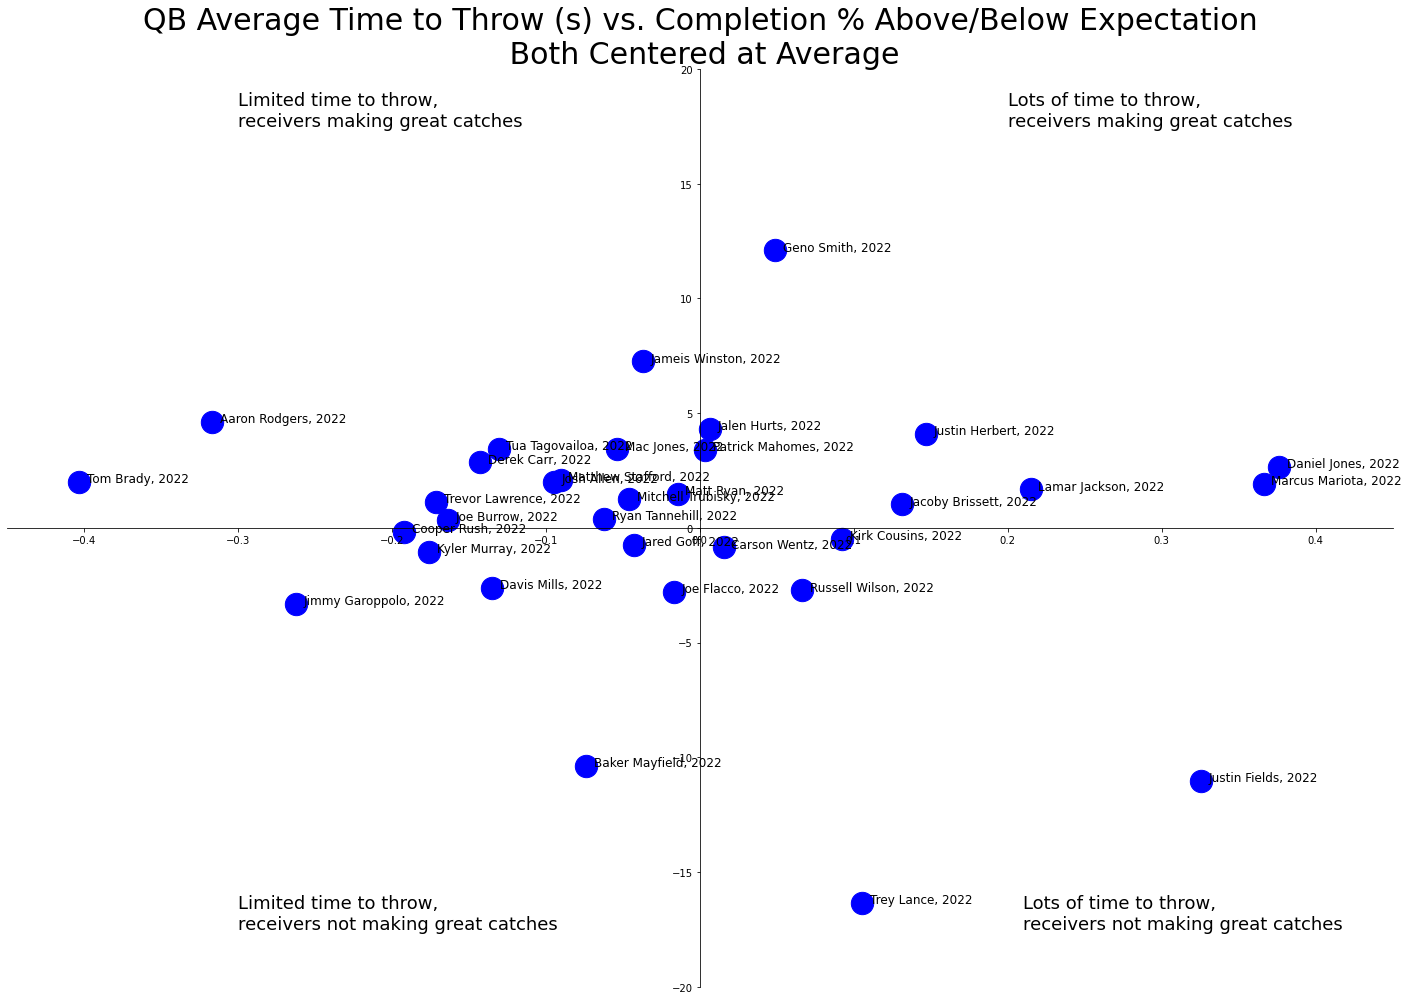

In [11]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for qb in df.index:
    x.append(df['avg_time_to_throw'][qb] - average_ttt)
    y.append(df['completion_percentage_above_expectation'][qb] - average_cpae)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s=500, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set x and y axis limits
plt.xlim((-0.45,0.45))
plt.ylim((-20,20))


# Annotate with QB name and year
for nameyear in xy.index:
    plt.annotate(f"{df['player_display_name'][nameyear]}, {df['season'][nameyear]}",\
                 (xy['x'][nameyear] + 0.005,
                  xy['y'][nameyear] - 0.025),
                  fontsize=12)

# Annotate Quadrants
plt.annotate('Lots of time to throw,\nreceivers making great catches', (0.2,17.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.3,17.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.3,-17.5), fontsize=18)
plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.21,-17.5), fontsize=18)
    

# Add a title
plt.title(f'QB Average Time to Throw (s) vs. Completion % Above/Below Expectation\n Both Centered at Average',
         fontdict={'fontsize': 30})

    
# Style the chart
plt.show()